# Рубежный контроль по дисциплине "Методы машинного обучения" №1.
## Выполнил: Громоздов Д.Р.; группа ИУ5-23М
### Вариант 5

In [1]:
#импортируем все необходимык для выполнения РК библиотеки:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder

## Задача 1(№5 в списке условий). Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

Для первой задачи используем датасет, содержащий информацию о статьях в нидерландских журналах.

In [2]:
data = pd.read_csv('datasets/dutch-news-articles.csv', sep=",")

In [3]:
data.shape

(238099, 5)

In [4]:
data.head() #просмотрим, какие данные о журналистских статьях содержатся в данном датасете

,datetime,title,content,category,url
0,2010-01-01 00:49:00,Enige Litouwse kerncentrale dicht,De enige kerncentrale van Litouwen is oudjaars...,Buitenland,https://nos.nl/artikel/126231-enige-litouwse-k...
1,2010-01-01 02:08:00,Spanje eerste EU-voorzitter onder nieuw verdrag,Spanje is met ingang van vandaag voorzitter va...,Buitenland,https://nos.nl/artikel/126230-spanje-eerste-eu...
2,2010-01-01 02:09:00,Fout justitie in Blackwater-zaak,Vijf werknemers van het omstreden Amerikaanse ...,Buitenland,https://nos.nl/artikel/126233-fout-justitie-in...
3,2010-01-01 05:14:00,"Museumplein vol, minder druk in Rotterdam",Het Oud en Nieuwfeest op het Museumplein in Am...,Binnenland,https://nos.nl/artikel/126232-museumplein-vol-...
4,2010-01-01 05:30:00,Obama krijgt rapporten over aanslag,President Obama heeft de eerste rapporten gekr...,Buitenland,https://nos.nl/artikel/126236-obama-krijgt-rap...


In [5]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('datetime', ('object', 0)),
 ('title', ('object', 0)),
 ('content', ('object', 0)),
 ('category', ('object', 0)),
 ('url', ('object', 0))]

Нам попался хороший (для выполнения данного задания) датасет, не содержащий пропусков. Датасет достаточно объёмный, поэтому исключим из датасета несколько колонок для ускорения обработки запросов.
Колонки, содержащие длинные url-ссылки и полное содержимое статей, в данном задании нам не особо интересны, оставим только колонки с датой, заголовком и категорией статьи, которую и будем кодировать. 

In [6]:
cols_filter = ['datetime', 'title', 'category']
data_categorize = data[cols_filter]
data_categorize.head()

,datetime,title,category
0,2010-01-01 00:49:00,Enige Litouwse kerncentrale dicht,Buitenland
1,2010-01-01 02:08:00,Spanje eerste EU-voorzitter onder nieuw verdrag,Buitenland
2,2010-01-01 02:09:00,Fout justitie in Blackwater-zaak,Buitenland
3,2010-01-01 05:14:00,"Museumplein vol, minder druk in Rotterdam",Binnenland
4,2010-01-01 05:30:00,Obama krijgt rapporten over aanslag,Buitenland


Задачу кодирования можно решить с использованием разных библиотек. Рассмотрим варианты sklearn, pandas (get_dummies) и category_encoders

### Библиотека sklearn.

In [7]:
#using sklearn library
ohe = OneHotEncoder()
category_encoded = ohe.fit_transform(data_categorize[['category']])
category_encoded

<238099x9 sparse matrix of type '<class 'numpy.float64'>'
	with 238099 stored elements in Compressed Sparse Row format>

In [8]:
category_encoded.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Библиотека pandas (get_dummies)

In [9]:
#using pandas get dummies
pd.get_dummies(data_categorize[['category']]).head()

,category_Binnenland,category_Buitenland,category_Cultuur & Media,category_Economie,category_Koningshuis,category_Opmerkelijk,category_Politiek,category_Regionaal nieuws,category_Tech
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


### Библиотека Category_Encoders

In [10]:
#датасет объёмный и на всю его обработку не хватает памяти, поэтому возмём из него только часть строк
#data_part = data_categorize.iloc[560:1560, :]
ce_OneHotEncoder1 = ce_OneHotEncoder()
#category_ohe = ce_OneHotEncoder1.fit_transform(data_part[data_part.columns.difference(['title'])])
#поскольку datetime и title не числовые значения, исключаем их из категоризации, иначе они тоже one-hot категоризуются 
#и происходит нехватка памяти. Оставляем только ту колонку, которая нас интересует. 

category_ohe = ce_OneHotEncoder1.fit_transform(data_categorize[data_categorize.columns.difference(['datetime','title'])])
category_ohe

,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
238094,1,0,0,0,0,0,0,0,0
238095,0,1,0,0,0,0,0,0,0
238096,0,1,0,0,0,0,0,0,0
238097,1,0,0,0,0,0,0,0,0


## Задача 2(25). Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

Для второй задачи используем датасет, содержащий информацию о ценах на жильё в Тунисе.

In [11]:
data_out=pd.read_csv('datasets/prices.csv', sep=",")

In [12]:
data_out.shape

(12748, 9)

In [13]:
data_out.head() #просмотрим, какие данные о продажах в Тунисе содержатся в данном датасете

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [14]:
data_feat = list(zip(
# признаки
[i for i in data_out.columns],
zip(
    # типы колонок
    [str(i) for i in data_out.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_out.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_feat
#отследим пропуски в данных, если они имеются. В данном случае их в датасете нет.

[('category', ('object', 0)),
 ('room_count', ('float64', 0)),
 ('bathroom_count', ('float64', 0)),
 ('size', ('float64', 0)),
 ('type', ('object', 0)),
 ('price', ('float64', 0)),
 ('city', ('object', 0)),
 ('region', ('object', 0)),
 ('log_price', ('float64', 0))]

In [15]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # скрипичная диаграмма
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

Изучим наш датасет на предмет выбросов.

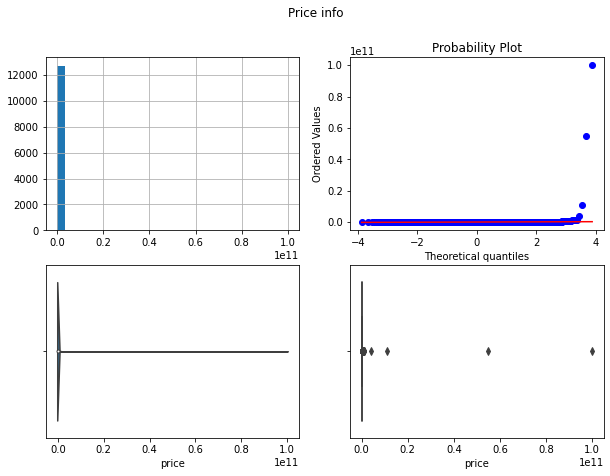

In [16]:
diagnostic_plots(data_out, 'price', 'Price info')

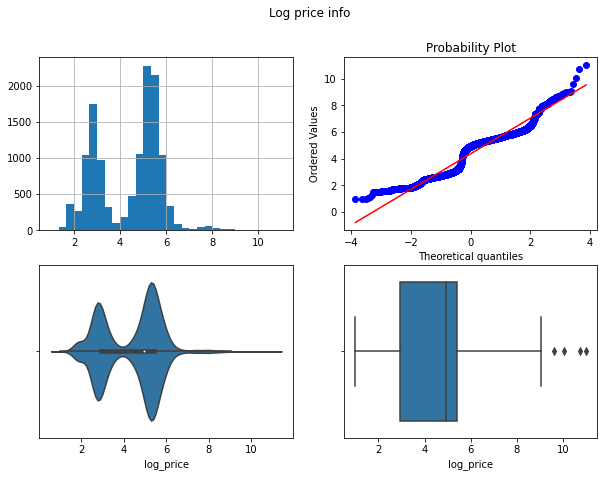

In [17]:
diagnostic_plots(data_out, 'log_price', 'Log price info')

Судя по графикам распределение ассиметричное и в данном датасете обнаружилось небольшое количество выбросов для логарифма от цены - обнаружим и удалим их на основе метода межквартильного размаха.

In [18]:
#создадим функцию обнаружения выбросов только для метода межквартильного размаха
def get_outlier_boundaries(df, col):
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
    return lower_boundary, upper_boundary 

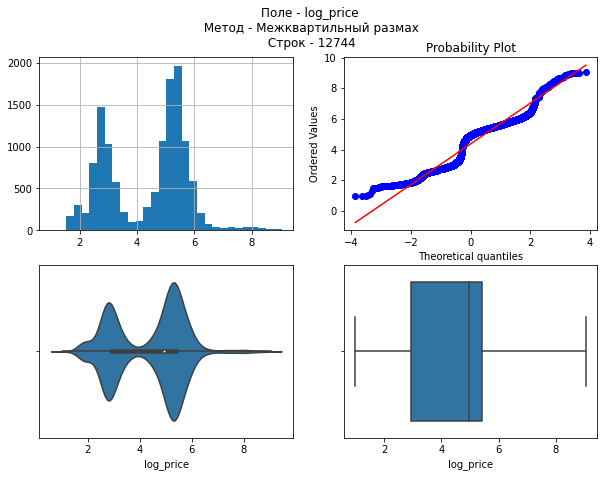

In [19]:
obt = 'Межквартильный размах'
col = 'log_price'
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data_out, col)
# Флаги для удаления выбросов
outliers_temp = np.where(data_out[col] > upper_boundary, True, 
                            np.where(data_out[col] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data_out.loc[~(outliers_temp), ]  
title = 'Поле - {}\n Метод - {}\n Строк - {}'.format(col, obt, data_trimmed.shape[0])
diagnostic_plots(data_trimmed, col, title)

Как видно из графиков -- имевшиеся выбросы были успешны удалены.

## Построение графика "ящик с усами" 

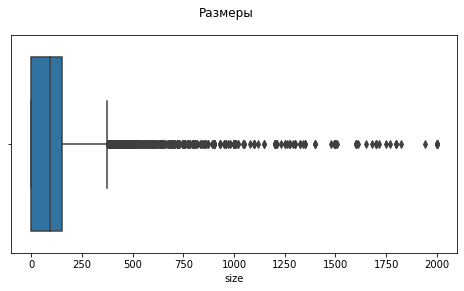

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x=data_out['size'])  
fig.suptitle('Размеры')
plt.show()